In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt
import matplotlib.style
import os
from dateutil.relativedelta import relativedelta
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### Read the true and predicted values

In [76]:
path = '/content/drive/MyDrive/news-based-forecasting/price_data/'
data_length = 2915
num_yrs_to_plot = 8
kgs_in_quintal = 1
start = dt.datetime(2012,12,31)
crops = ['Onion', 'Potato', 'Rice', 'Wheat']
arima_preds = dict()
earima_preds = dict()
ren_preds = dict()
lstm_preds = dict()
true_prices = dict()
plot_diff = 0
plot_errors = True
plot_returns = False
raw_returns = False

for crop in crops:
  if plot_returns:
    true_prices[crop] = np.diff(np.ravel(np.load(f'{path}true_{crop}_returns.npy')), plot_diff)[-data_length:]/kgs_in_quintal
  else:
    true_prices[crop] = np.diff(np.ravel(pd.read_csv(f'{path}{crop}.csv', parse_dates = ['date'], index_col = ['date'])), plot_diff)[-data_length:]/kgs_in_quintal
  arima_preds[crop] = np.diff(np.ravel(np.load(f'{path}arima_{crop}.npy')), plot_diff)[-data_length:]/kgs_in_quintal
  earima_preds[crop] = np.diff(np.ravel(np.load(f'{path}earima_{crop}.npy')), plot_diff)[-data_length:]/kgs_in_quintal
  file_suffix = '_returns' if plot_returns else ''
  ren_preds[crop] = np.diff(np.ravel(np.load(f'{path}ren_{crop}{file_suffix}.npy')), plot_diff)[-data_length:]/kgs_in_quintal
  lstm_preds[crop] = np.diff(np.ravel(np.load(f'{path}lstm_{crop}{file_suffix}.npy')), plot_diff)[-data_length:]/kgs_in_quintal
  if raw_returns:
    ren_preds[crop] = np.exp(ren_preds[crop]) - 1
    lstm_preds[crop] = np.exp(lstm_preds[crop]) - 1
    true_prices[crop] = np.exp(true_prices[crop]) - 1

  if plot_errors:
    arima_preds[crop] -= true_prices[crop]
    earima_preds[crop] -= true_prices[crop]
    ren_preds[crop] -= true_prices[crop]
    lstm_preds[crop] -= true_prices[crop]



In [ ]:
on_true = np.load(path%('Onion','true'))
on_arima = np.load(path%('Onion','arima'))

In [ ]:
path_2 = '/content/drive/MyDrive/MSOM_price_data/'
df_o = pd.read_csv(f'{path_2}Onion.csv', parse_dates = ['date'], index_col = ['date'])

In [ ]:
np.ravel(df_o.iloc[2557:].values)

array([1322.89976134, 1344.678487  , 1325.25295508, ..., 2226.94117647,
       2247.84313725, 2380.49019608])

In [ ]:
on_arima, on_true[5:]

(array([1606.95508956, 1242.15972482, 1240.58293844, ..., 3314.40404646,
        3259.4062782 , 3220.11864535]),
 array([1254.94372294, 1355.87793427, 1340.32374101, ..., 2226.94117647,
        2247.84313725, 2380.49019608]))

In [ ]:
on_ren = np.load(path%('arima', 'Onion'))/kgs_in_quintal[-data_length:]
len(on_ren)

TypeError: ignored

In [ ]:
'''

on_true = np.load(path%('Onion','true'))[:data_length]/kgs_in_quintal
on_ren = np.ravel(np.load(path%('Onion','ren'))/kgs_in_quintal)
on_rnn = np.load(path%('Onion','rnn'))/kgs_in_quintal
on_arima = np.load(path%('Onion','arima'))[-data_length:]/kgs_in_quintal
on_earima = np.load(path%('Onion','earima'))[-data_length:]/kgs_in_quintal


## Potato
pot_true = np.load(path%('Potato','true'))[:data_length]/kgs_in_quintal
pot_ren = np.ravel(np.load(path%('Potato','ren'))[:data_length]/kgs_in_quintal)
pot_rnn = np.load(path%('Potato','rnn'))[:data_length]/kgs_in_quintal
pot_arima = np.load(path%('Potato','arima'))[:data_length]/kgs_in_quintal
pot_earima = np.load(path%('Potato','earima'))[:data_length]/kgs_in_quintal


## Rice
rice_true = np.load(path%('Rice','true'))[:data_length]/kgs_in_quintal
rice_ren = np.ravel(np.load(path%('Rice','ren'))[:data_length]/kgs_in_quintal)
rice_rnn = np.load(path%('Rice','rnn'))[:data_length]/kgs_in_quintal
rice_arima = np.load(path%('Rice','arima'))[:data_length]/kgs_in_quintal
rice_earima = np.load(path%('Rice','earima'))[:data_length]/kgs_in_quintal


## Wheat
wh_true = np.load(path%('Wheat','true'))[:data_length]/kgs_in_quintal
wh_ren = np.ravel(np.load(path%('Wheat','ren'))[:data_length]/kgs_in_quintal)
wh_rnn = np.load(path%('Wheat','rnn'))[:data_length]/kgs_in_quintal
wh_arima = np.load(path%('Wheat','arima'))[-data_length]/kgs_in_quintal
wh_earima = np.load(path%('Wheat','earima'))[:data_length]/kgs_in_quintal
'''

"\n\non_true = np.load(path%('Onion','true'))[:data_length]/kgs_in_quintal\non_ren = np.ravel(np.load(path%('Onion','ren'))/kgs_in_quintal)\non_rnn = np.load(path%('Onion','rnn'))/kgs_in_quintal\non_arima = np.load(path%('Onion','arima'))[-data_length:]/kgs_in_quintal\non_earima = np.load(path%('Onion','earima'))[-data_length:]/kgs_in_quintal\n\n\n## Potato\npot_true = np.load(path%('Potato','true'))[:data_length]/kgs_in_quintal\npot_ren = np.ravel(np.load(path%('Potato','ren'))[:data_length]/kgs_in_quintal)\npot_rnn = np.load(path%('Potato','rnn'))[:data_length]/kgs_in_quintal\npot_arima = np.load(path%('Potato','arima'))[:data_length]/kgs_in_quintal\npot_earima = np.load(path%('Potato','earima'))[:data_length]/kgs_in_quintal\n\n\n## Rice\nrice_true = np.load(path%('Rice','true'))[:data_length]/kgs_in_quintal\nrice_ren = np.ravel(np.load(path%('Rice','ren'))[:data_length]/kgs_in_quintal)\nrice_rnn = np.load(path%('Rice','rnn'))[:data_length]/kgs_in_quintal\nrice_arima = np.load(path%(

### Plot

In [ ]:
#### Selective dates for x-ticks
dateindexes = [0,181,365,365+181,365+365,365+365+181,365+365+365]
dateindexes2 = [0]
leap_years = [7,15]
lpyr = 0
#for i in range(1,2*8+1): ### 8= total years
#    if i in leap_years:
#      lpyr+=1

#    if i%2==0:
#        dateindexes2.append(dateindexes2[i-1]+(365+lpyr-181))
#    else:
#       dateindexes2.append(dateindexes2[i-1]+181+lpyr)

#xdates  = []


In [70]:
xdates = [str(start.date())]
tmp = start.date()
#for k in dateindexes2:
#    xdates.append(str(start.date()+dt.timedelta(k)))
for i in range(num_yrs_to_plot):
    tmp += relativedelta(years=1)
    xdates.append(str(tmp))
#### Converting x-tick labels into yy-mmm format
dates = [dt.datetime.strptime(k, '%Y-%m-%d').date().strftime('%d-%b-%y') for k in xdates]
#### Generating all dates
xxdates = []
for i in range(data_length):
    xxdates.append(str(start.date()+dt.timedelta(i)))

In [116]:
rnn_color = 'aquamarine'
rnn_alpha = 1.0

ren_color = 'red'
ren_alpha = 0.6

earima_color = 'red'
earima_alpha = 1.0
earima_name = 'AR+events'

arima_color = 'aquamarine'
arima_alpha = 1.0
arima_name = 'AR'

true_color = 'royalblue'
true_alpha = 0.7

rmse_fontsize = 35
ytick_fontsize = 40

ren_linewidth = 1.0
rnn_linewidth = 3.0
arima_linewidth = 3.0
earima_linewidth = 1.0
true_linewidth = 3.0

rnn_order = 1
ren_order = 2
true_order = 1
arima_order = 1
earima_order= 2

In [118]:
#fig, axs = plt.subplots(2, 2,figsize=(30, 25))
# ax1 = axs[0,0]
# ax2 = axs[0,1]
# ax3 = axs[1,0]
# ax4 = axs[1,1]

fig = plt.figure(figsize=(40,25))
gs1 = gridspec.GridSpec(4, 1)
gs1.update(wspace=0.04, hspace=0.2) # set the spacing between axes.

ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])

crop_name_xpos = 100
crop = 'Onion'
if not plot_errors:
  ax1.plot(xxdates,true_prices[crop],linewidth=true_linewidth,alpha=true_alpha,zorder = true_order,label='True', color=true_color)
#ax1.plot(xxdates,ren_preds[crop],linewidth=ren_linewidth,color=ren_color,alpha=ren_alpha,zorder = ren_order, label='REN')
#ax1.plot(xxdates,lstm_preds[crop],linewidth=rnn_linewidth,zorder=rnn_order,label='RNN',alpha=rnn_alpha, color=rnn_color)
ax1.plot(xxdates,earima_preds[crop],linewidth=earima_linewidth,zorder=earima_order,label=earima_name,alpha=earima_alpha, color=earima_color)
ax1.plot(xxdates,arima_preds[crop],linewidth=arima_linewidth,zorder=arima_order,label=arima_name,alpha=arima_alpha, color=arima_color)
ax1.text(crop_name_xpos, 1500,'Onion',fontsize = rmse_fontsize)
crop = 'Potato'
if not plot_errors:
  ax2.plot(xxdates,true_prices[crop],linewidth=true_linewidth,alpha=true_alpha,zorder = true_order,label='True', color=true_color)
#ax2.plot(xxdates,ren_preds[crop],linewidth=ren_linewidth,color=ren_color,alpha=ren_alpha,zorder = ren_order, label='REN')
#ax2.plot(xxdates,lstm_preds[crop],linewidth=rnn_linewidth,zorder=rnn_order,label='RNN',alpha=rnn_alpha, color=rnn_color)
ax2.plot(xxdates,earima_preds[crop],linewidth=earima_linewidth,zorder=earima_order,label=earima_name,alpha=earima_alpha, color=earima_color)
ax2.plot(xxdates,arima_preds[crop],linewidth=arima_linewidth,zorder=arima_order,label=arima_name,alpha=arima_alpha, color=arima_color)
ax2.text(crop_name_xpos, 350,'Potato', fontsize = rmse_fontsize)


#ax1.set(xlabel='', xticks=xdates, ylim=[0,85])
ax1.set(xlabel='', xticks=xdates)
#ax1.set(xlabel='', xticks=xdates, ylim=[0, true_prices['Onion'].max()+10])
#ax2.set(xlabel='', ylabel='',xticks=xdates,ylim=[0,40])
ax2.set(xlabel='', ylabel='',xticks=xdates)
#ax2.set(xlabel='', ylabel='',xticks=xdates,ylim=[0, true_prices['Potato'].max()+10])
#ax1.set_ylabel('Price (\u20B9/kg)',fontsize=40)
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
#ax2.set_yticklabels([])
#ax2.yaxis.tick_right()
crop = 'Rice'
if not plot_errors:
  ax3.plot(xxdates,true_prices[crop],linewidth=true_linewidth,alpha=true_alpha,zorder = true_order,label='True', color=true_color)
#ax3.plot(xxdates,ren_preds[crop],linewidth=ren_linewidth,color=ren_color,alpha=ren_alpha,zorder = ren_order, label='REN')
#ax3.plot(xxdates,lstm_preds[crop],linewidth=rnn_linewidth,zorder=rnn_order,label='RNN',alpha=rnn_alpha, color=rnn_color)
ax3.plot(xxdates,earima_preds[crop],linewidth=earima_linewidth,zorder=earima_order,label=earima_name,alpha=earima_alpha, color=earima_color)
ax3.plot(xxdates,arima_preds[crop],linewidth=arima_linewidth,zorder=arima_order,label=arima_name,alpha=arima_alpha, color=arima_color)
ax3.text(crop_name_xpos,510,'Rice',fontsize = rmse_fontsize)

crop = 'Wheat'
if not plot_errors:
  ax4.plot(xxdates,true_prices[crop],linewidth=true_linewidth, alpha=true_alpha,zorder = true_order,label='Actual',color=true_color)
#ax4.plot(xxdates,ren_preds[crop],linewidth=ren_linewidth,color=ren_color,alpha=ren_alpha,zorder = ren_order, label='Our method (REN)')
#ax4.plot(xxdates,lstm_preds[crop],linewidth=rnn_linewidth,zorder=rnn_order,label='LSTM', alpha=rnn_alpha, color=rnn_color)
ax4.plot(xxdates,earima_preds[crop],linewidth=earima_linewidth,zorder=earima_order,label=earima_name,alpha=earima_alpha, color=earima_color)
ax4.plot(xxdates,arima_preds[crop],linewidth=arima_linewidth,zorder=arima_order,label=arima_name,alpha=arima_alpha, color=arima_color)
ax4.text(crop_name_xpos,210,'Wheat',fontsize = rmse_fontsize)

#ax3.set(xlabel='', xticks=xdates, ylim=[0,50])
ax3.set(xlabel='', xticks=xdates)
#ax4.set(xlabel='', ylabel='',xticks=xdates, ylim=[0,30])
ax4.set(xlabel='', ylabel='',xticks=xdates)


#ax3.set(xlabel='', xticks=xdates,ylim=[0,5000],yticks = np.arange(0, 5000, step=500))

#ax3.set(xlabel='', xticks=xdates, ylim=[0, true_prices['Rice'].max()+10])
#ax3.set_title('Rice', fontsize=rmse_fontsize)
#ax4.set(xlabel='', ylabel='',xticks=xdates,ylim=[0,5000],yticks = np.arange(0, 5000, step=500))

#ax4.set(xlabel='', ylabel='', xticks=xdates, ylim=[0, true_prices['Wheat'].max()+10])


#ax3.set_ylabel('Price (\u20B9/kg)',fontsize=40)
#ax4.set_xticks(xlabels_positions)
#ax4.yaxis.tick_right()

#ax1.legend(loc='best', shadow=True, fontsize=25)
#ax2.legend(loc='best', shadow=True, fontsize=25)
#ax3.legend(loc='lower right', shadow=True, fontsize=25)
#ax4.legend(loc='lower right', shadow=True, fontsize=25)

#ax1.set_yticklabels(np.arange(0,9000,1000),fontsize=25)
#ax3.set_yticklabels(np.arange(0, 50, 10), fontsize=25)
#ax2.set_yticklabels(np.arange(0, 40, 10), fontsize=25)
#ax4.set_yticklabels(np.arange(0, 50, 10), fontsize=25)
#ax1.set_yticklabels(np.arange(0, 80, 20), fontsize=25)


#ax3.set_xticklabels(dates, fontsize=25, rotation=0)
ax4.set_xticklabels(dates, fontsize=ytick_fontsize, rotation=0)
ax4.tick_params(axis='y', labelsize=ytick_fontsize)
ax3.tick_params(axis='y', labelsize=ytick_fontsize)
ax2.tick_params(axis='y', labelsize=ytick_fontsize)
ax1.tick_params(axis='y', labelsize=ytick_fontsize)
handles, labels = ax4.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', fancybox=True, fontsize=rmse_fontsize, ncol=5)
#fig.text(0.01,0.5,'Price (\u20B9/kg)',va='center',fontsize=40,rotation='vertical')
if plot_returns:
  fig.text(-0.02,0.5,'returns' if raw_returns else 'log(1 + returns)',va='center',fontsize=50,rotation='vertical')
else:
  fig.text(-0.02,0.5,'Forecast error (\u20B9/quintal)',va='center',fontsize=50,rotation='vertical')
#ax4.set_yticklabels([])
plt.setp(leg.get_lines(), linewidth=8)

ax1.grid(color='k', linewidth=.5, linestyle=':', axis='both')
ax2.grid(color='k', linewidth=.5, linestyle=':', axis='both')
ax3.grid(color='k', linewidth=.5, linestyle=':', axis='both')
ax4.grid(color='k', linewidth=.5, linestyle=':', axis='both')
#plt.close('all')
gs1.tight_layout(fig)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# compute rmse values
# onion
on_ren_rmse = np.sqrt(np.mean((on_true-on_ren)**2))
on_rnn_rmse = np.sqrt(np.mean((on_true-on_rnn)**2))
on_arima_rmse = np.sqrt(np.mean((on_true-on_arima)**2))
on_earima_rmse = np.sqrt(np.mean((on_true-on_earima)**2))

# potato
pot_ren_rmse = np.sqrt(np.mean((pot_true-pot_ren)**2))
pot_rnn_rmse = np.sqrt(np.mean((pot_true-pot_rnn)**2))
pot_arima_rmse = np.sqrt(np.mean((pot_true-pot_arima)**2))
pot_earima_rmse = np.sqrt(np.mean((pot_true-pot_earima)**2))

# rice
rice_ren_rmse = np.sqrt(np.mean((rice_true-rice_ren)**2))
rice_rnn_rmse = np.sqrt(np.mean((rice_true-rice_rnn)**2))
rice_arima_rmse = np.sqrt(np.mean((rice_true-rice_arima)**2))
rice_earima_rmse = np.sqrt(np.mean((rice_true-rice_earima)**2))

# wheat
wh_ren_rmse = np.sqrt(np.mean((wh_true-wh_ren)**2))
wh_rnn_rmse = np.sqrt(np.mean((wh_true-wh_rnn)**2))
wh_arima_rmse = np.sqrt(np.mean((wh_true-wh_arima)**2))
wh_earima_rmse = np.sqrt(np.mean((wh_true-wh_earima)**2))

ren_rmses = np.array([on_ren_rmse, pot_ren_rmse, rice_ren_rmse, wh_ren_rmse])
rnn_rmses = np.array([on_rnn_rmse, pot_rnn_rmse, rice_rnn_rmse, wh_rnn_rmse])
earima_rmses = np.array([on_earima_rmse, pot_earima_rmse, rice_earima_rmse, wh_earima_rmse])
arima_rmses = np.array([on_arima_rmse, pot_arima_rmse, rice_arima_rmse, wh_arima_rmse])

In [ ]:
print(arima_rmses)

[9.52145714 4.79869303 3.05036129 1.9115616 ]


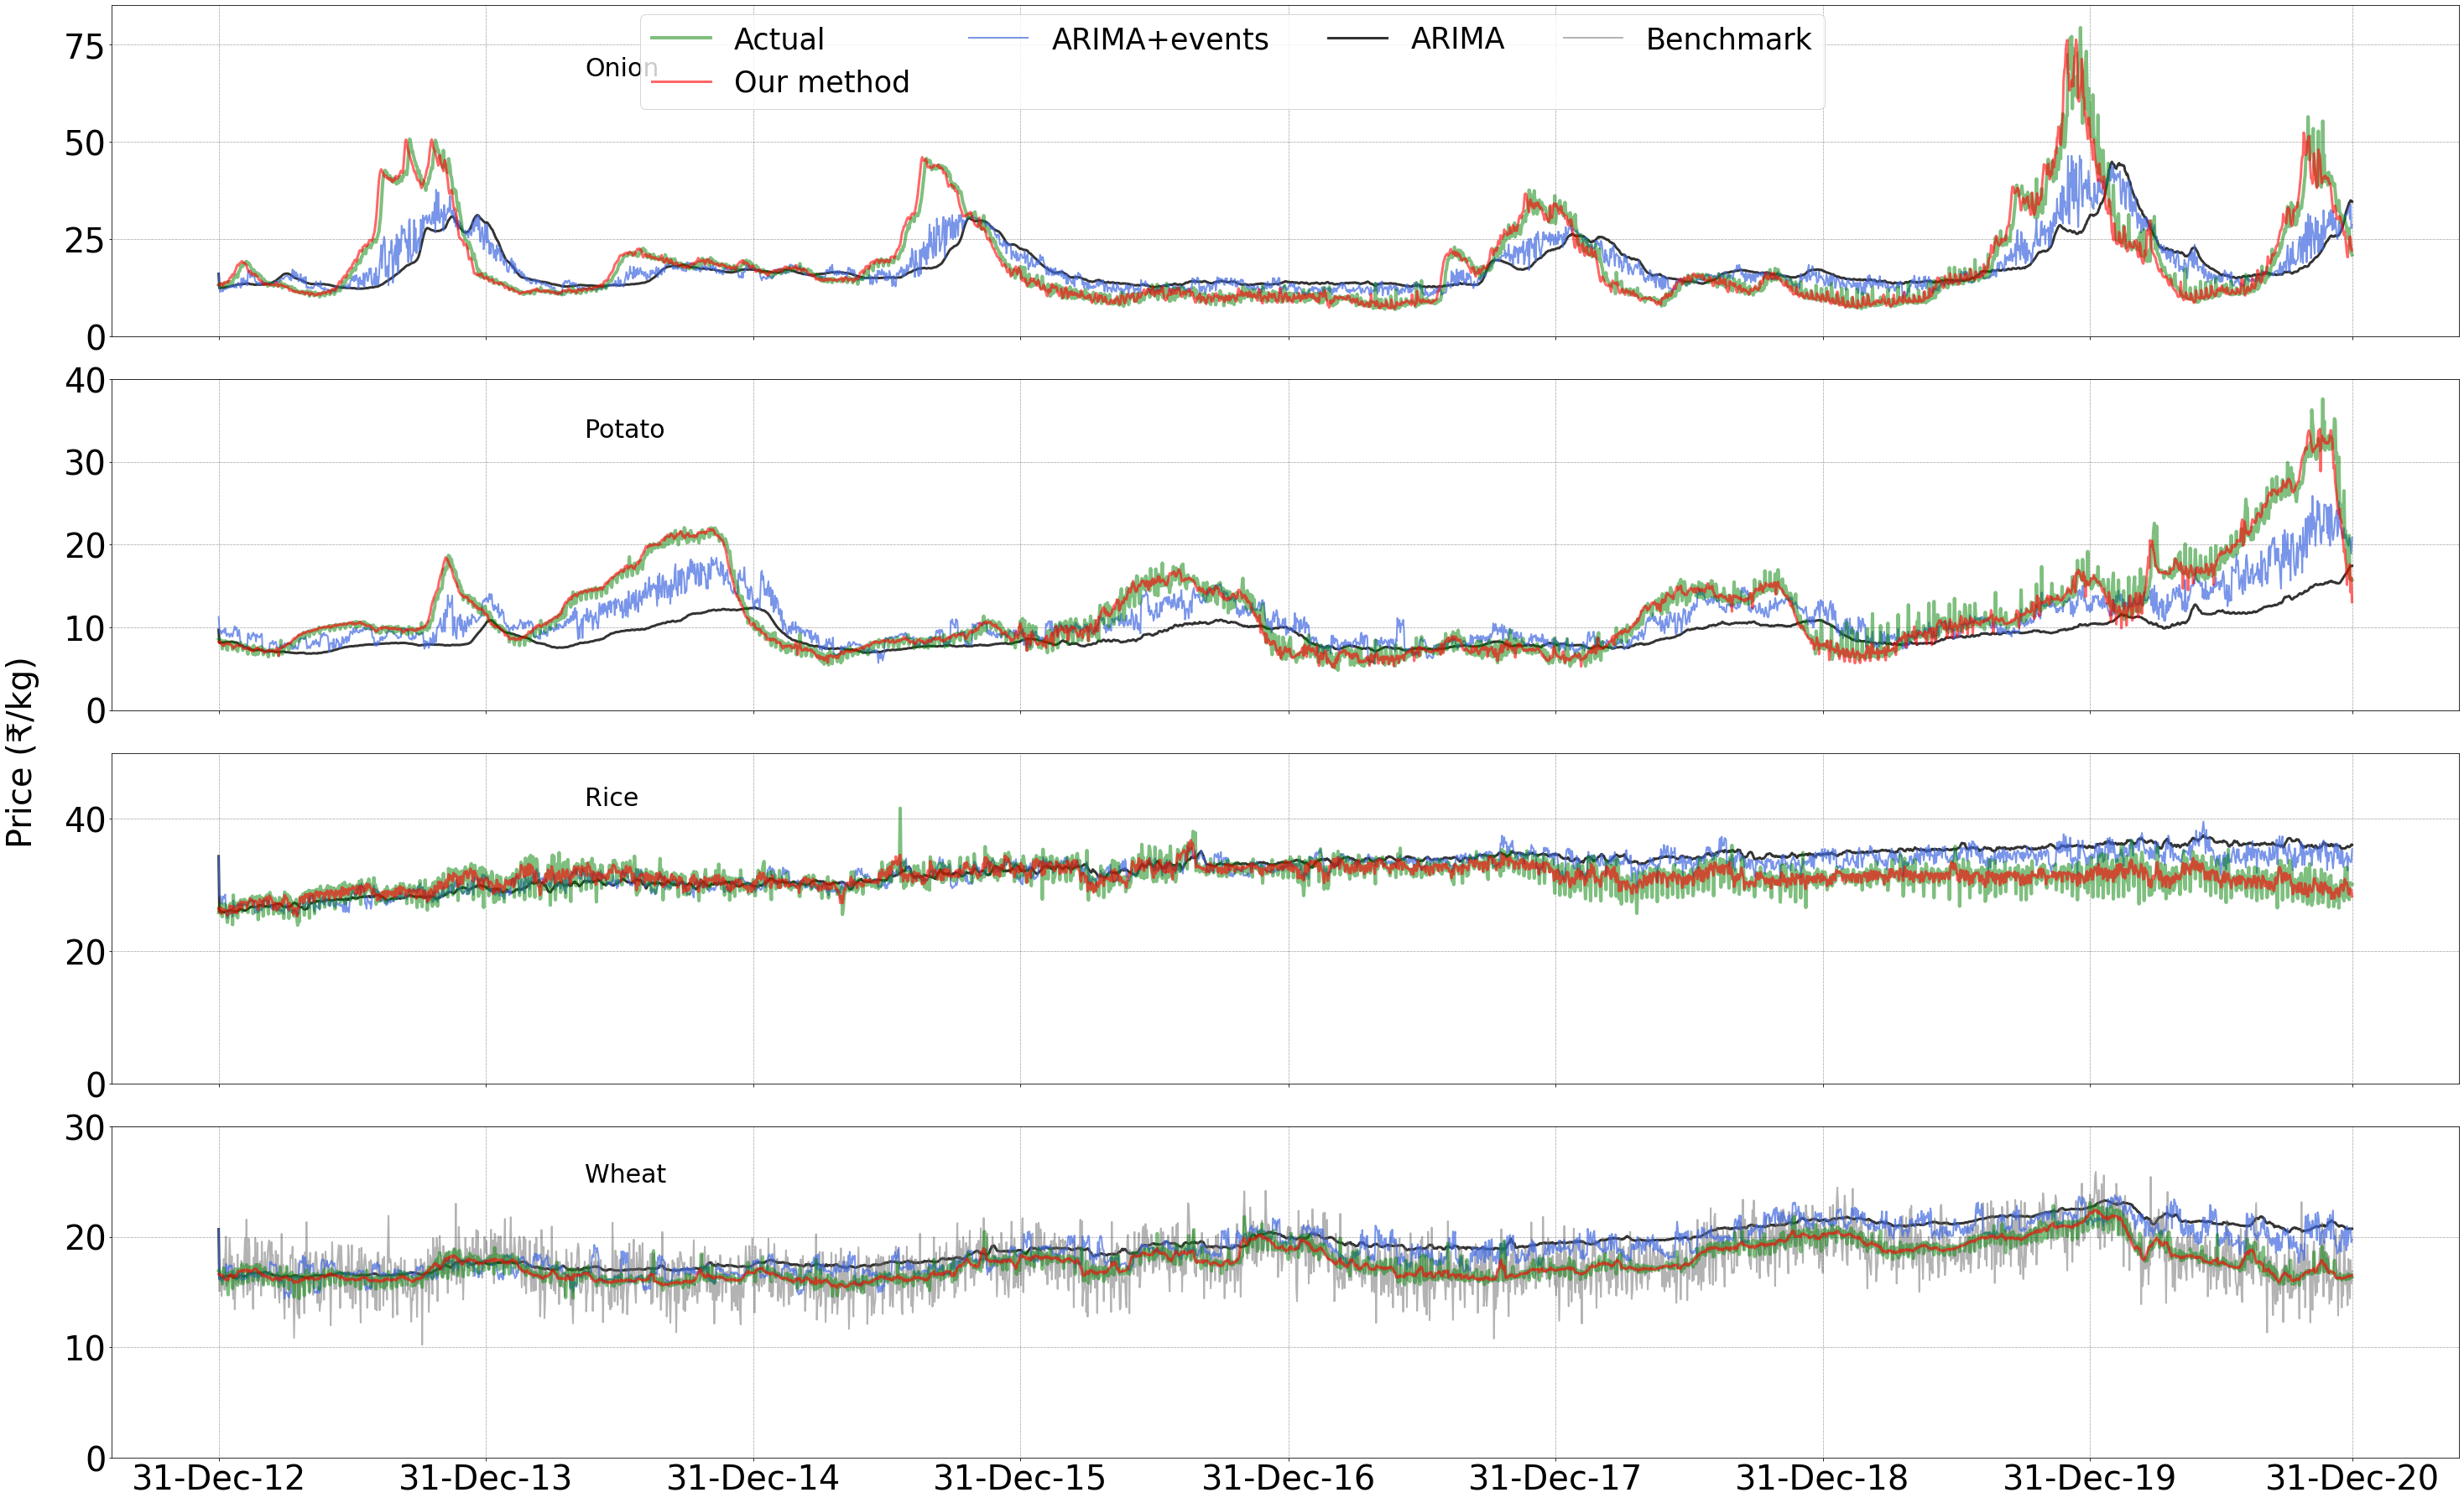

In [ ]:
fig = plt.figure(figsize=(40,25))
gs1 = gridspec.GridSpec(4, 1)
gs1.update(wspace=0.04, hspace=0.2) # set the spacing between axes.

ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])


crop_name_xpos = 500

ax1.plot(xxdates,on_true,linewidth=4.0,alpha=0.5,zorder = 3,label='True', color='g')
ax1.plot(xxdates,on_ren,linewidth=3.0,color='r',alpha=0.6,zorder = 4, label='REN')
ax1.plot(xxdates,on_earima,linewidth=2.0,zorder=2,label=earima_name,alpha=earima_alpha, color=earima_color)
ax1.plot(xxdates,on_arima,linewidth=3.0,zorder=1,label=arima_name,alpha=arima_alpha, color=arima_color)
ax1.text(crop_name_xpos,67,'Onion',fontsize = 30)
#ax1.text(0,600,'RMSE:',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax1.text(0,350,'REN:  92.8',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax1.text(0,100,'RNN:261.5',fontsize = rmse_fontsize,color=(.4,.4,.4))

ax2.plot(xxdates,pot_true,linewidth=4.0,alpha=0.5,zorder = 3,label='True', color='g')
ax2.plot(xxdates,pot_ren,linewidth=3.0,color='r',alpha=0.6,zorder = 4,label='REN')
ax2.plot(xxdates,pot_earima,linewidth=2.0,zorder=2,label=earima_name,alpha=earima_alpha, color=earima_color)
ax2.plot(xxdates,pot_arima,linewidth=3.0,zorder=1,label=arima_name,alpha=arima_alpha, color=arima_color)
ax2.text(crop_name_xpos,33,'Potato',fontsize = 30)
#ax2.text(0,300,'RMSE:',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax2.text(0,175,'REN:  84.7',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax2.text(0,50,'RNN:272.2',fontsize = rmse_fontsize,color=(.4,.4,.4))


ax1.set(xlabel='', xticks=xdates, ylim=[0,85])
ax2.set(xlabel='', ylabel='',xticks=xdates,ylim=[0,40])
#ax1.set_ylabel('Price (\u20B9/kg)',fontsize=40)
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
#ax2.set_yticklabels([])
#ax2.yaxis.tick_right()


ax3.plot(xxdates,rice_true,linewidth=4.0,alpha=0.5,zorder = 3,label='True', color='g')
ax3.plot(xxdates,rice_ren,linewidth=3.0,color='r',alpha=0.6,zorder = 4,label='REN')
ax3.plot(xxdates,rice_earima,linewidth=2.0,zorder=2,label=earima_name,alpha=earima_alpha, color=earima_color)
ax3.plot(xxdates,rice_arima,linewidth=3.0,zorder=1,label=arima_name,alpha=arima_alpha, color=arima_color)
ax3.text(crop_name_xpos,42,'Rice',fontsize = 30)
#ax3.text(0,600,'RMSE:',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax3.text(0,350,'REN:  197.4',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax3.text(0,50,'RNN: 422.7',fontsize = rmse_fontsize,color=(.4,.4,.4))


ax4.plot(xxdates,wh_true,linewidth=4.0, alpha=0.5,zorder = 3,label='Actual', color='g')
ax4.plot(xxdates,wh_ren,linewidth=3.0,color='r',alpha=0.6,zorder = 4, label='Our method')
ax4.plot(xxdates,wh_earima,linewidth=2.0,zorder=2,label=earima_name,alpha=earima_alpha, color=earima_color)
ax4.plot(xxdates,wh_arima,linewidth=3.0,zorder=1,label=arima_name,alpha=arima_alpha, color=arima_color)
ax4.plot(xxdates,wh_rnn,linewidth=2.0,zorder=1,label='Benchmark', alpha=rnn_alpha, color=rnn_color)
ax4.text(crop_name_xpos,25,'Wheat',fontsize = 30)
#ax4.text(0,400,'RMSE:',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax4.text(0,250,'REN:  58.3',fontsize = rmse_fontsize,color=(.4,.4,.4))
#ax4.text(0,100,'RNN:395.8',fontsize = rmse_fontsize,color=(.4,.4,.4))


#ax3.set(xlabel='', xticks=xdates,ylim=[0,5000],yticks = np.arange(0, 5000, step=500))
ax3.set(xlabel='', xticks=xdates, ylim=[0,50])
#ax3.set_title('Rice', fontsize=rmse_fontsize)
#ax4.set(xlabel='', ylabel='',xticks=xdates,ylim=[0,5000],yticks = np.arange(0, 5000, step=500))
ax4.set(xlabel='', ylabel='',xticks=xdates, ylim=[0,30])
#ax4.set_title('Wheat', fontsize=rmse_fontsize)
#ax1.set_title('Onion', fontsize=rmse_fontsize)
#ax2.set_title('Potato', fontsize=rmse_fontsize)


#ax3.set_ylabel('Price (\u20B9/kg)',fontsize=40)
#ax4.set_xticks(xlabels_positions)
#ax4.yaxis.tick_right()

#ax1.legend(loc='best', shadow=True, fontsize=25)
#ax2.legend(loc='best', shadow=True, fontsize=25)
#ax3.legend(loc='lower right', shadow=True, fontsize=25)
#ax4.legend(loc='lower right', shadow=True, fontsize=25)

#ax1.set_yticklabels(np.arange(0,9000,1000),fontsize=25)
#ax3.set_yticklabels(np.arange(0, 50, 10), fontsize=25)
#ax2.set_yticklabels(np.arange(0, 40, 10), fontsize=25)
#ax4.set_yticklabels(np.arange(0, 50, 10), fontsize=25)
#ax1.set_yticklabels(np.arange(0, 80, 20), fontsize=25)


#ax3.set_xticklabels(dates, fontsize=25, rotation=0)
ax4.set_xticklabels(dates, fontsize=ytick_fontsize, rotation=0)
ax4.tick_params(axis='y', labelsize=ytick_fontsize)
ax3.tick_params(axis='y', labelsize=ytick_fontsize)
ax2.tick_params(axis='y', labelsize=ytick_fontsize)
ax1.tick_params(axis='y', labelsize=ytick_fontsize)
handles, labels = ax4.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fancybox=True, fontsize=rmse_fontsize, ncol=4)
fig.text(-0.02,0.5,'Price (\u20B9/kg)',va='center',fontsize=40,rotation='vertical')
#ax4.set_yticklabels([])

ax1.grid(color='k', linewidth=.5, linestyle=':', axis='both')
ax2.grid(color='k', linewidth=.5, linestyle=':', axis='both')
ax3.grid(color='k', linewidth=.5, linestyle=':', axis='both')
ax4.grid(color='k', linewidth=.5, linestyle=':', axis='both')
#plt.close('all')
#plt.tight_layout()
gs1.tight_layout(fig)

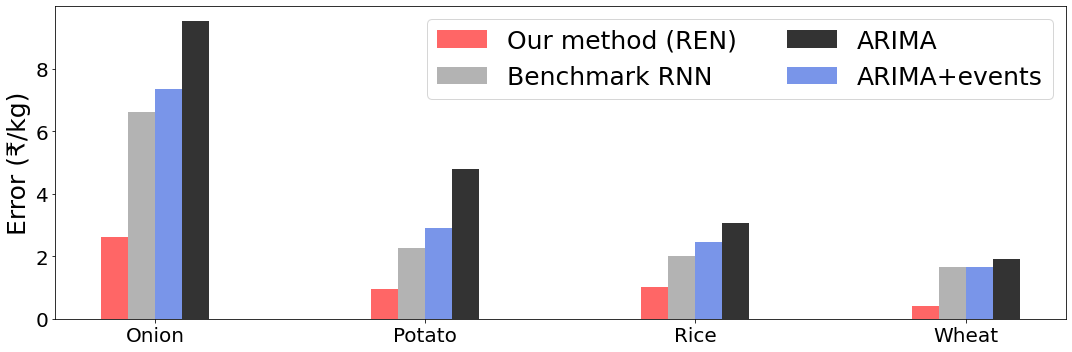

In [ ]:
plot_all = True

# Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
crops = ['Onion', 'Potato', 'Rice', 'Wheat']
rmse_xticks = np.arange(len(crops))  # the label locations
width = 0.1  # the width of the bars

our_method_name = 'Our method (REN)'
rnn_benchmark_name = 'Benchmark RNN'
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(rmse_xticks, ren_rmses, width, label=our_method_name, color='r', alpha=0.6)
rects2 = ax.bar(rmse_xticks+width, rnn_rmses, width, label=rnn_benchmark_name, color=rnn_color, alpha=rnn_alpha)
if plot_all:
  rects3 = ax.bar(rmse_xticks+3*width, arima_rmses, width, label='ARIMA', color=arima_color, alpha=arima_alpha)
  rects4 = ax.bar(rmse_xticks+2*width, earima_rmses, width, label=earima_name, color=earima_color, alpha=earima_alpha)

labeltick_fs = 20
legend_fs = 25
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error (\u20B9/kg)', fontsize=25)
#ax.set_title('RMSE in predicting crop prices', fontsize=30)
if plot_all:
  ax.set_xticks(rmse_xticks+1.5*width)
else:
 ax.set_xticks(rmse_xticks+0.5*width)
ax.set_xticklabels(crops)
ax.legend(fontsize=legend_fs, ncol=2, fancybox=True)
ax.tick_params(axis='both', labelsize=labeltick_fs)
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
if plot_all:
  plt.savefig('rmse_all.pdf')
else:
  plt.savefig('rmse_ren_and_rnn.pdf')

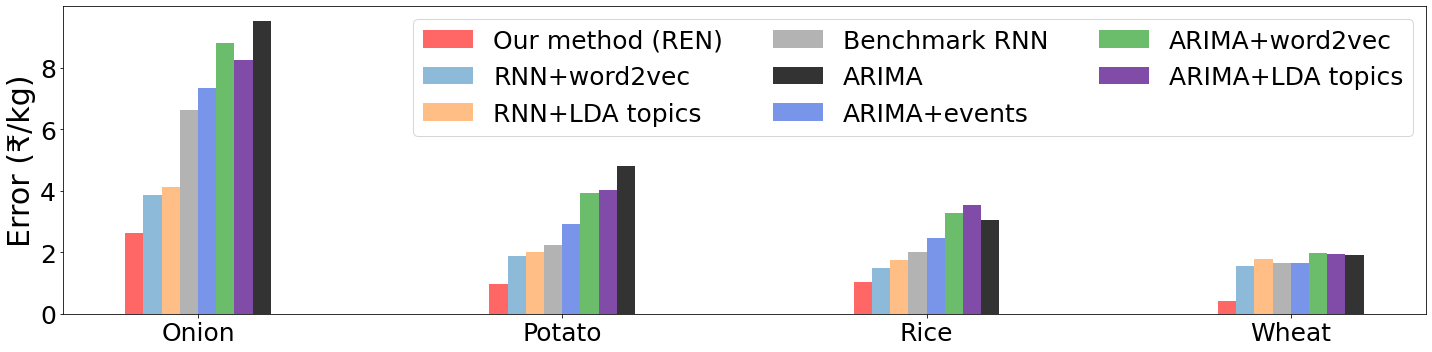

In [ ]:
# Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
crops = ['Onion', 'Potato', 'Rice', 'Wheat']
rmse_xticks = np.arange(len(crops))  # the label locations
width = 0.05  # the width of the bars

our_method_name = 'Our method (REN)'
rnn_and_lda = 'RNN+LDA topics'
rnn_and_word2vec = 'RNN+word2vec'
arima_and_lda = 'ARIMA+LDA topics'
arima_and_word2vec = 'ARIMA+word2vec'
rnn_benchmark_name = 'Benchmark RNN'
arima_and_word2vec_rmses = np.array([8.8, 3.93, 3.28, 1.98])
arima_and_lda_rmses = np.array([8.27, 4.04, 3.55, 1.93])
rnn_and_word2vec_rmses = np.array([3.87, 1.88, 1.5, 1.54])
rnn_and_lda_rmses = np.array([4.14, 2.02, 1.74, 1.77])


fig, ax = plt.subplots(figsize=(20, 5))
rects1 = ax.bar(rmse_xticks, ren_rmses, width, label=our_method_name, color='r', alpha=0.6)
rects6 = ax.bar(rmse_xticks+width, rnn_and_word2vec_rmses, width, label=rnn_and_word2vec, alpha=rnn_alpha)
rects5 = ax.bar(rmse_xticks+2*width, rnn_and_lda_rmses, width, label=rnn_and_lda, alpha=rnn_alpha)
rects2 = ax.bar(rmse_xticks+3*width, rnn_rmses, width, label=rnn_benchmark_name, color=rnn_color, alpha=rnn_alpha)
rects3 = ax.bar(rmse_xticks+7*width, arima_rmses, width, label='ARIMA', color=arima_color, alpha=arima_alpha)
rects4 = ax.bar(rmse_xticks+4*width, earima_rmses, width, label=earima_name, color=earima_color, alpha=earima_alpha)
rects7 = ax.bar(rmse_xticks+5*width, arima_and_word2vec_rmses, width, label=arima_and_word2vec, alpha=earima_alpha)
rects8 = ax.bar(rmse_xticks+6*width, arima_and_lda_rmses, width, label=arima_and_lda, alpha=earima_alpha, color='indigo')

labeltick_fs = 25
legend_fs = 25
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error (\u20B9/kg)', fontsize=30)
#ax.set_title('RMSE in predicting crop prices', fontsize=30)
ax.set_xticks(rmse_xticks+3.5*width)
ax.set_xticklabels(crops)
ax.legend(fontsize=legend_fs, ncol=3, fancybox=True)
ax.tick_params(axis='both', labelsize=labeltick_fs)
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

In [ ]:
rnn_and_lda_rmses

[4.14, 2.02, 1.74, 1.77]

In [ ]:
(arima_and_lda_rmses - earima_rmses)/earima_rmses

array([0.12651861, 0.3864085 , 0.44674692, 0.16932385])

In [ ]:
on_ren_rmse/40.88, pot_ren_rmse/21.03

(0.06442332849794483, 0.04565775586965755)

In [ ]:
np.abs(on_rnn_rmse- on_earima_rmse)/on_arima_rmse

0.30552982859850647

In [ ]:
on_rnn_rmse, on_earima_rmse

(6.612367973320355, 7.341201391098436)

In [ ]:
on_prices = np.load(path%('Onion','true'))

In [ ]:
on_prices[-30:]

array([3501.92156863, 3315.98039216, 3233.49019608, 3298.62745098,
       3491.17647059, 3203.52941176, 3157.94117647, 2909.2745098 ,
       3115.29411765, 3017.15686275, 3082.25490196, 3056.39215686,
       3023.82352941, 2920.45098039, 2860.        , 2702.45098039,
       2765.05882353, 2521.33333333, 2775.49019608, 2406.37254902,
       2222.54901961, 2139.66666667, 2092.21568627, 2626.37254902,
       2262.01960784, 2773.7254902 , 2232.05882353, 2226.94117647,
       2247.84313725, 2380.49019608])

In [ ]:
np.mean(pot_true), np.mean(on_true), np.mean(rice_true), np.mean(wh_true)

(11.865001722032778, 18.80455597575046, 31.205373265815624, 17.69981232229104)

In [ ]:
np.mean(pot_ren), np.mean(on_ren), np.mean(rice_ren), np.mean(wh_ren)

(11.874582, 18.866865, 31.231678, 17.655348)

In [ ]:
pot_ren_rmse, on_ren_rmse, rice_ren_rmse, wh_ren_rmse

(0.9601826059388984,
 2.6336256689959847,
 1.0310327773451702,
 0.4243632191800776)

In [ ]:
pot_rnn_rmse, on_rnn_rmse, rice_rnn_rmse, wh_rnn_rmse

(2.250289533657785, 6.612367973320355, 1.9949389127262873, 1.6428169480036112)

In [ ]:
on_prices_rnn_full = np.load(path%('Onion','rnn'))

In [ ]:
on_prices_rnn_full

array([1099.83649357, 1828.18236988, 1696.85799158, ..., 2648.94884832,
       1976.33145262, 1769.75415107])

In [ ]:
0.25*(np.abs(on_ren_rmse-on_rnn_rmse)/on_rnn_rmse + np.abs(wh_ren_rmse-wh_rnn_rmse)/wh_rnn_rmse + np.abs(pot_ren_rmse-pot_rnn_rmse)/pot_rnn_rmse+ np.abs(rice_ren_rmse-rice_rnn_rmse)/rice_rnn_rmse)

0.5999701636506646